In [1]:
import math

# base function

def f(x):
    return math.sin(x/5) * math.exp(x/10) + 5 * math.exp(-x/2)
print (f(4))

0.676676416183


## Задача 1. Минимизация гладкой функции

In [3]:
from scipy.optimize import minimize

In [54]:
#x0 = [1., 4., 8., 10., 13., 15., 17., 20., 22., 24., 26., 28., 30.]
x0 = [2.]
res0 = minimize(f, x0, method = 'BFGS')
print res0

      fun: 1.7452682903447336
 hess_inv: array([[ 5.98752645]])
      jac: array([ -2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627628])


In [55]:
x1 = [30.]
res1 = minimize(f, x1, method = 'BFGS')
print res1

      fun: -11.898894665981265
 hess_inv: array([[ 1.67840334]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 25.88019347])


In [57]:
# write to file
file_obj = open('l3-submission1.txt', 'w')
string = str(round(res0.fun, 2)) + ' ' + str(round(res1.fun, 2))
file_obj.write(string)
file_obj.close()

## Задача 2: глобальная оптимизация

In [22]:
from scipy.optimize import differential_evolution

In [58]:
x2 = (1., 30.)
res2 = differential_evolution(f, [x2])
print res2

     fun: -11.898894665981304
     jac: array([ 0.])
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 6
 success: True
       x: array([ 25.88019278])


In [59]:
# write to file
file_obj = open('l3-submission2.txt', 'w')
string = str(round(res2.fun, 2))
file_obj.write(string)
file_obj.close()

## Задача 3. Минимизация негладкой функции

In [51]:
import numpy as np

def f1(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

def h(x):
    return (f1(x).astype(int))

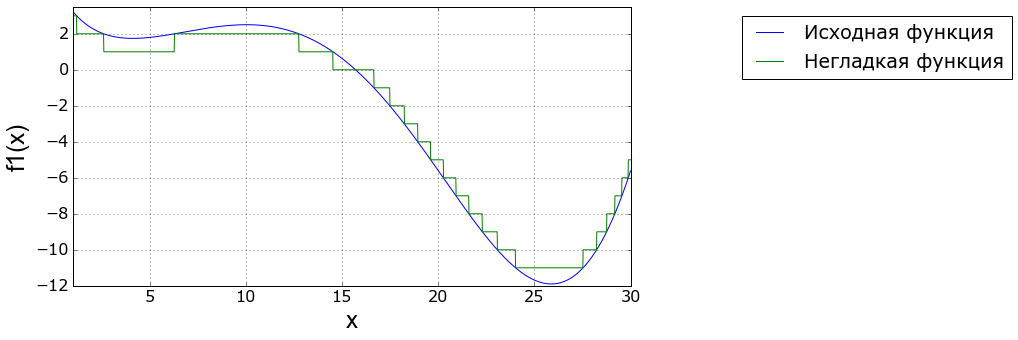

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
mpl.rc('font', family='Verdana', size =16)
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(1, 30, 2000)

ax.axis([1., 30., -12., 3.5])
ax.grid()
ax.plot(x, f1(x), label = u'Исходная функция')
plt.plot(x, h(x), label = u'Негладкая функция')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 24})
ax.set_ylabel(u'f1(x)',{'fontname':'Arial', 'size': 24})

ax.legend(bbox_to_anchor=(1.7, 1.))

plt.show()

In [68]:
x31 = [30.]
res31 = minimize(h, x31, method = 'BFGS')
print res31.fun

[-5]


In [64]:
x32 = (1., 30.)
res32 = differential_evolution(h, [x32])
print res32

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([ 24.31870382])


In [71]:
file_obj = open('l3-submission3.txt', 'w')
string = str(round(res31.fun, 2)) + ' ' + str(round(res32.fun, 2))
file_obj.write(string)
file_obj.close()